# 프로젝트 1 : 당뇨병 수치

**데이터 가져오기**


---



In [145]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [146]:
df_X = diabetes.data
df_y = diabetes.target

**모델에 입력할 데이터 X와 예측할 데이터 y 준비하기**

In [147]:
print(df_X.shape)          # 데이터의 크기 확인 
print(df_y.shape)          # 데이터의 크기 확인

(442, 10)
(442,)


In [148]:
print(diabetes.DESCR)       # diabetes 데이터셋의 설명

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [149]:
# 10개의 특성(나이, 성별, 체지방 지수 등...)
# 442개의 데이터는 442명의 당뇨병 환자들의 데이터
for i, feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [150]:
# 첫번째 환자의 데이터
print('<x_data[0]> : ', df_X[0])
print()
print('<y_data[0] : ', df_y[0])

<x_data[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

<y_data[0] :  151.0


**train 데이터와 test 데이터로 분리하기**

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X,
                                                    df_y,
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


**모델 준비하기**

In [152]:
# W와 b에 랜덤 초기값 설정
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [153]:
# W에 12개의 랜덤한 값
W

array([0.43491504, 0.58434018, 0.1832492 , 0.0497677 , 0.99206592,
       0.6083561 , 0.73165323, 0.19687847, 0.49352512, 0.88747986])

In [154]:
# b는 하나의 상수값
b

0.20134006444663755

In [155]:
# 1부터 12까지 X * W를 수행하고, 마지막에 b를 더함
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

**손실함수 loss 정의하기**

In [156]:
# MSE 값을 구하는 함수
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [157]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE (predictions, y)
    return L

**기울기를 구하는 gradient 함수 구현하기**

In [158]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [159]:
dW, db = gradient(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [ -65.45377749   -3.73211609 -175.74809155 -131.06391071  -45.99204617
  -31.47670848  109.96027655 -115.46025068 -158.03325304 -123.98876406]
db: -307.0670102580228


**하이퍼 파라미터인 학습률 설정하기**

In [160]:
# 학습률 = 0.02
LEARNING_RATE = 0.02

In [161]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
         print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 15905.4819
Iteration 20 : Loss 9666.7545
Iteration 30 : Loss 6772.2307
Iteration 40 : Loss 5380.2232
Iteration 50 : Loss 4671.8645
Iteration 60 : Loss 4281.3045
Iteration 70 : Loss 4043.7230
Iteration 80 : Loss 3883.8060
Iteration 90 : Loss 3766.3219
Iteration 100 : Loss 3674.1663
Iteration 110 : Loss 3598.5700
Iteration 120 : Loss 3534.7002
Iteration 130 : Loss 3479.6619
Iteration 140 : Loss 3431.5708
Iteration 150 : Loss 3389.1105
Iteration 160 : Loss 3351.3103
Iteration 170 : Loss 3317.4268
Iteration 180 : Loss 3286.8755
Iteration 190 : Loss 3259.1889
Iteration 200 : Loss 3233.9873
Iteration 210 : Loss 3210.9595
Iteration 220 : Loss 3189.8475
Iteration 230 : Loss 3170.4356
Iteration 240 : Loss 3152.5419
Iteration 250 : Loss 3136.0118
Iteration 260 : Loss 3120.7124
Iteration 270 : Loss 3106.5291
Iteration 280 : Loss 3093.3617
Iteration 290 : Loss 3081.1224
Iteration 300 : Loss 3069.7337
Iteration 310 : Loss 3059.1264
Iteration 320 : Loss 3049.2387
Iteration 330 : 

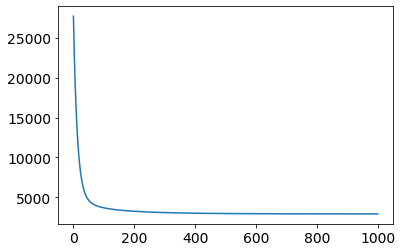

In [162]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [163]:
W, b

(array([  39.9809265 , -225.92888237,  536.48569361,  335.039746  ,
         -85.43207502, -128.48865856, -218.39285976,  145.38893614,
         396.47432037,   90.75493336]), 151.3210317871308)

In [164]:
# X_test 데이터와 y_test 데이터를 예측
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2874.4329961923845

<function matplotlib.pyplot.show>

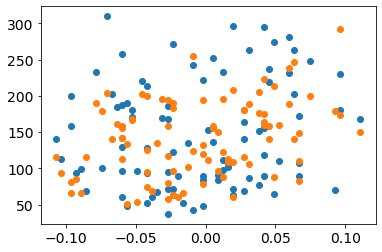

In [165]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show

✍ 회고

* L127, gradient(X, W, b, y)을 입력하였더니 에러가 발생하였다. 에러의 원인은 훈련한 데이터를 인자로 하여 X와 y 자리에 넣어줘야 했기 때문이다. 그래서 gradient(X_train, W, b, y_train)으로 정정하였더니 에러없이 출력되었음을 확인할 수 있다.

* learning rate의 값을 조금씩 바꿔주면서 이상적인 손실함수 그래프를 출력하고자 하였다. 결국 learning rate가 0.02일 때 그래프가 효과적으로 잘 내려가는 것을 알 수 있었다.

* 모델이 예측한 prediction과 실제 정답인 y_test를 비교하였더니 어느정도 잘 맞힌 결과가 나왔다. 직접 손실함수를 설계하여 그래프로 출력까지 하면서 전체적인 원리를 더 잘할 수 있게 되었다.

# 프로젝트 2 : 자전거 대여 수요 예측

**데이터 가져오기**

In [172]:
import pandas as pd

train = pd.read_csv('/content/sample_data/train.csv')

train.head()
#rain.csv 데이터를 train 변수로 가져온다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기**

In [173]:
from datetime import datetime

train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')
# 다른 방법으로 astype(str) 으로 자료형 변환 가능

In [177]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [178]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [287]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second
# 6가지 컬럼을 생성한다.

In [292]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

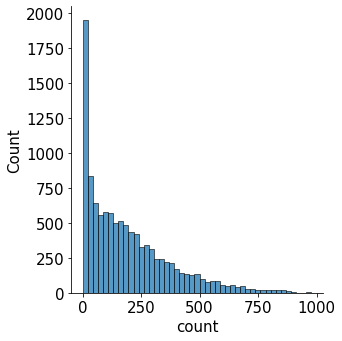

In [293]:
# 분포도 추가
# 타깃값인 count의 분포도 그리기
# 타깃값의 분포를 알면 훈련 시 타깃값을 그대로 사용할지 변환해 사용할지 파악할 수 있기 때문

mpl.rc('font', size=15)      # 폰트 크기를 15로 설정 
sns.displot(train['count']); # 분포도 출력

* count(타깃값)이 0에 몰려있다
* 정규분포를 따르기 위해 log 변환해준다.

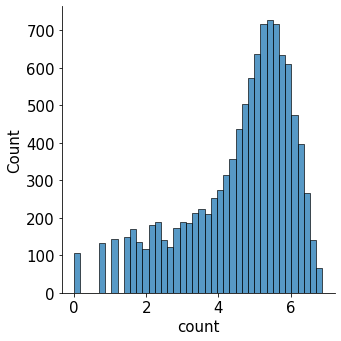

In [294]:
sns.displot(np.log(train['count']));

**year, month, day, hour, minute, second 데이터 개수 시각화하기**

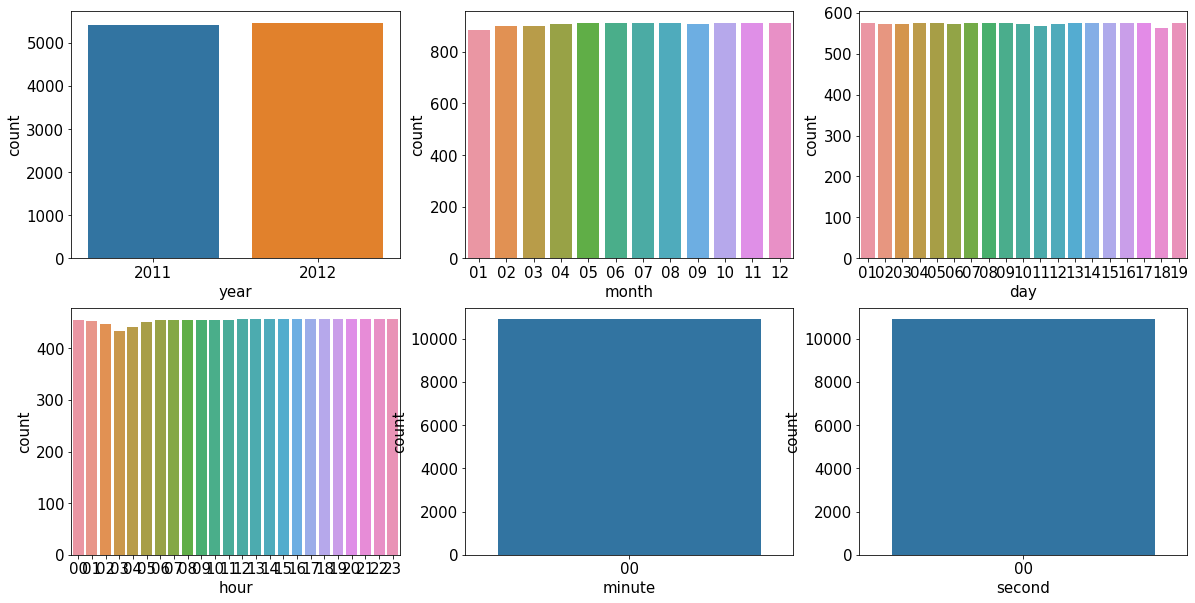

In [218]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(x = 'year', data=train)

plt.subplot(2,3,2)
sns.countplot(x = 'month', data=train)

plt.subplot(2,3,3)
sns.countplot(x = 'day', data=train)

plt.subplot(2,3,4)
sns.countplot(x = 'hour', data=train)

plt.subplot(2,3,5)
sns.countplot(x = 'minute', data=train)

plt.subplot(2,3,6)
sns.countplot(x = 'second',data=train)

plt.show()

**X, y 컬럼 선택 및 train/test 데이터 분리**

In [187]:
X = train[['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',]].values
y = train[['count']].values

In [279]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 11) (8708, 1)
(2178, 11) (2178, 1)


**LinearRegression 모델 학습**

In [280]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  #LinearRegression 모델 불러오기

In [281]:
model.fit(X_train, y_train)  # 모델 학습하기

LinearRegression()

학습된 모델로 X_test 에 대한 예측값 출력 및 손실함수값 계산

In [282]:
predictions = model.predict(X_test)
predictions
# 모델이 예측한 값

array([[-33.96697339],
       [ 59.23679918],
       [112.62548605],
       ...,
       [195.79183719],
       [197.74006566],
       [294.24680107]])

In [283]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse
# 손실함수 값 계산

19733.30581586304

In [284]:
rmse = mse**0.5
rmse
# 위에서 계산 mse를 바탕으로 rmse 계산

140.47528542723464

In [285]:
col = ['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
X_test_df = pd.DataFrame(X_test, columns=col)
X_test_df['predictions'] = predictions
X_test_df['y_test'] = y_test

In [212]:
X_test_df

,season,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,predictions,y_test
0,3,1,1,33.62,40.15,59,0.0,2011,07,19,11,248.058916,127
1,1,0,1,4.1,6.82,54,6.0032,2012,01,16,06,56.380815,13
2,4,0,1,9.84,11.365,48,12.998,2011,12,11,18,200.227700,163
3,3,1,2,29.52,34.09,62,12.998,2012,08,15,10,292.817393,233
4,2,1,1,25.42,31.06,53,16.9979,2012,06,15,23,388.759208,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,2,0,3,23.78,27.275,49,19.0012,2011,05,08,17,223.424206,351
2174,1,1,3,13.12,15.15,66,22.0028,2012,01,17,04,68.454724,2
2175,4,0,1,16.4,20.455,40,12.998,2012,11,04,14,308.936382,509
2176,1,0,1,11.48,14.395,81,7.0015,2012,01,01,05,37.202781,5


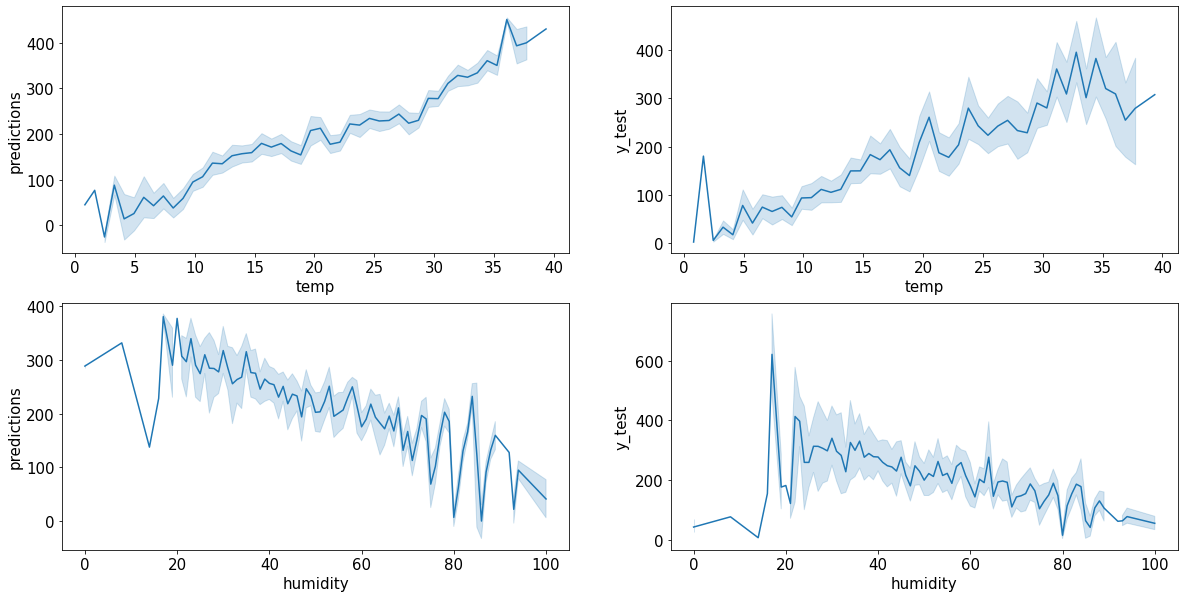

In [213]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['predictions'])

plt.subplot(2,2,2)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['y_test'])

# X축에 temp 데이터, y축에 count 데이터

plt.subplot(2,2,3)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['predictions'])

plt.subplot(2,2,4)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['y_test'])

plt.show()

# X축에 humidity 데이터, y축에 count 데이터

* temp
x축 값이 온도일 때, 예측한 값과 테스트를 비교해보면 비슷한 그래프가 출력되는 것을 확인할 수 있다.
* humiditiy
x축 값이 습도일 때도 마찬가지로 예측 그래프와 테스트 그래프가 비슷하게 출력되는 것을 볼 수 있다.

* 자전거 수요 예측 모델을 잘 만들어졌다고 할 수 있다.

✍ 회고


* LinearRegression 모델을 활용하여 직접 손실함수와 기울기를 계산하지 않았다. 모델을 이용하니 더욱 편리함을 느낄 수 있었다.


* 캐글 필사 때는 barplot을 이용했지만, 이번 프로젝트에선 countplot을 사용했다. barplot이 countpolot과 큰 차이점은 y축 값의 설정이 가능하다는 것이다. 위에서 출력한 countplot을 보면 정교한 y축 설정을 하지 못하였다. 그래서 막대그래프들 간의 비교가 어려운 점을 확인할 수 있다.

* 타깃값의 분포를 그래프로 출력하여 타기값 변환이 필요한지 알 수 있었다.